In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import netCDF4 as nc
import datetime as datetime
import sys
import xarray as xr
import scipy
import time
from netCDF4 import Dataset
from datetime import datetime, timedelta

In [2]:
path=os.getcwd()
print(path)

C:\Users\evanl\Documents\TP_Slope_Stratified


En gros, U=U(x,y,t)=U[x][z][t], qui est un tableau 3D  
MAJ : on utilise la librairie xarray

In [3]:
file_path=r'C:\Users\evanl\Documents\TP_Slope_Stratified'
path_xx=r'C:\Users\evanl\Documents\TP_Slope_Stratified\Q12g5_xx.nc.nc4'
path_zz=r'C:\Users\evanl\Documents\TP_Slope_Stratified\Q12g5_zz.nc.nc4'
path_U_1=r'C:\Users\evanl\Documents\TP_Slope_Stratified\Q12g5_U_t_1_1000.nc.nc4'
path_U_2=r'C:\Users\evanl\Documents\TP_Slope_Stratified\Q12g5_U_t_1001_2000.nc.nc4'
path_W_1=r'C:\Users\evanl\Documents\TP_Slope_Stratified\Q12g5_W_t_1_1000.nc.nc4'
path_W_2=r'C:\Users\evanl\Documents\TP_Slope_Stratified\Q12g5_W_t_1001_2000.nc.nc4'
r_xx = xr.open_dataset(path_xx)
r_zz = xr.open_dataset(path_zz)
r_U_1 = xr.open_dataset(path_U_1)
r_U_2 = xr.open_dataset(path_U_2)
r_W_1 = xr.open_dataset(path_W_1)
r_W_2 = xr.open_dataset(path_W_2)
print(r_xx)
print(r_U_1)
#on extrait les variables qui nous intéressent sous forme de DataArray
zz=r_zz['zz'][:]
xx=r_xx['xx'][:]
U_1=r_U_1['U'][:]
U_2=r_U_2['U'][:]
W_1=r_W_1['W'][:]
W_2=r_W_2['W'][:]
print(len(U_1[0][0]))
print(len(U_2[0][0]))
#concaténation des U_1/U_2, W_1/W_2 sur l'axe temporel
U=xr.concat([U_1,U_2],dim='t')
W=xr.concat([W_1,W_2],dim='t')


<xarray.Dataset>
Dimensions:  (x: 413, y: 328)
Dimensions without coordinates: x, y
Data variables:
    xx       (x, y) float64 ...
Attributes:
    history:       2023-11-17 16:28:18 GMT hyrax-1.16.8-1 http://servdap.legi...
    history_json:  [{"$schema":"https:\/\/harmony.earthdata.nasa.gov\/schemas...
<xarray.Dataset>
Dimensions:  (x: 413, y: 328, t: 1001)
Dimensions without coordinates: x, y, t
Data variables:
    U        (x, y, t) float64 ...
Attributes:
    history:       2023-11-18 14:13:13 GMT hyrax-1.16.8-1 http://servdap.legi...
    history_json:  [{"$schema":"https:\/\/harmony.earthdata.nasa.gov\/schemas...
1001
1000


In [4]:
print(type(U))
print(U.dims)
print(U.dims[0])
print(xx.max())
print(xx.min())
print(zz.min())
print(zz.max())

<class 'xarray.core.dataarray.DataArray'>
('x', 'y', 't')
x
<xarray.DataArray 'xx' ()>
array(87.77041771)
<xarray.DataArray 'xx' ()>
array(-8.62621372)
<xarray.DataArray 'zz' ()>
array(-59.28226345)
<xarray.DataArray 'zz' ()>
array(17.22671344)


$yp=hs(1-tanh((xp-vi)/es))$

avec
- vi le point de derivee seconde nul (dans notre cas 38.87cm)
-es facteur d'echelle 18.8
-hs est la hauteur initiale ( environ 30cm a verifier dans les fichiers).   
**CETTE FORMULE EST VISIBLEMENT FAUSSE !!!!!**
Application d'un décalage aussi, de façon à n'avoir que des coordonnées positives

Coordinates:
  * x        (x) float64 -8.626 -8.392 -8.158 -7.924 ... 87.07 87.3 87.54 87.77
  * y        (y) float64 17.23 16.99 16.76 16.52 ... -58.58 -58.81 -59.05 -59.28
<xarray.DataArray 'x' (x: 413)>
array([-8.626214, -8.392241, -8.158269, ..., 87.302473, 87.536445, 87.770418])
Coordinates:
  * x        (x) float64 -8.626 -8.392 -8.158 -7.924 ... 87.07 87.3 87.54 87.77
Coordinates:
  * x        (x) float64 -8.626 -8.392 -8.158 -7.924 ... 87.07 87.3 87.54 87.77
  * y        (y) float64 17.23 16.99 16.76 16.52 ... -58.58 -58.81 -59.05 -59.28
<xarray.DataArray 'x' (x: 413)>
array([-8.626214, -8.392241, -8.158269, ..., 87.302473, 87.536445, 87.770418])
Coordinates:
  * x        (x) float64 -8.626 -8.392 -8.158 -7.924 ... 87.07 87.3 87.54 87.77


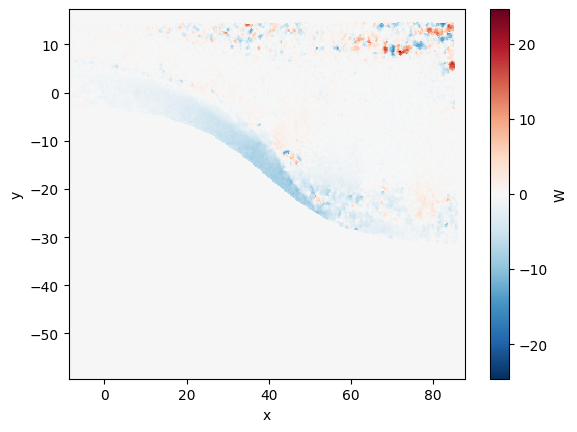

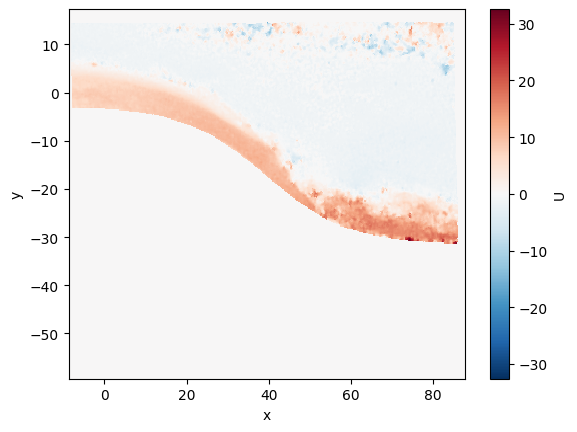

In [5]:
x_min=xx.sel(y=0).min()
y_min=zz.sel(x=0).min()
U.coords['x']=xx.sel(y=0);U.coords['y']=zz.sel(x=0)
W.coords['x']=xx.sel(y=0);W.coords['y']=zz.sel(x=0)

print(U.coords)
print(U.coords['x'])
fig=plt.figure()
xr.plot.pcolormesh(W.sel(t=0),x=W.dims[0],y=W.dims[1])
x=xx.sel(y=0)

print(U.coords)
print(U.coords['x'])
fig=plt.figure()
xr.plot.pcolormesh(U.sel(t=0),x=U.dims[0],y=U.dims[1])
x=xx.sel(y=0)

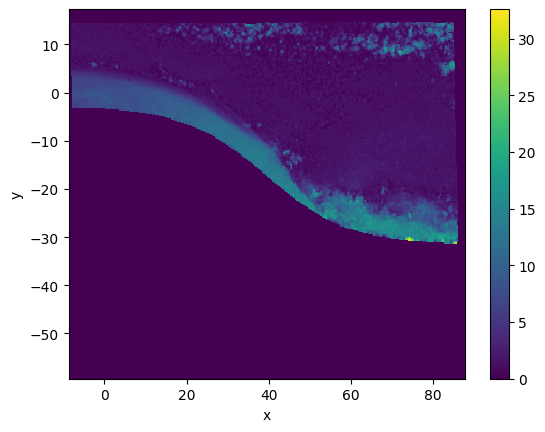

In [6]:
x_min=xx.sel(y=0).min()
y_min=zz.sel(x=0).min()
V=np.sqrt(U**2+W**2)
xr.plot.pcolormesh(V.sel(t=0),x=V.dims[0],y=V.dims[1])
#profil avec les paramètres du fit. ça a l'air correct
y=-14.39*(1.0-np.tanh((x-39.35)/-20.09))-2.7

Extraction des paramètres de y(x) : On prend les points où la norme de la vitesse est nulle

<xarray.DataArray 'x' (x: 413)>
array([-8.626214, -8.392241, -8.158269, ..., 87.302473, 87.536445, 87.770418])
Coordinates:
  * x        (x) float64 -8.626 -8.392 -8.158 -7.924 ... 87.07 87.3 87.54 87.77
<xarray.DataArray 'y' (y: 328)>
array([ 17.226713,  16.992741,  16.758769, ..., -58.814319, -59.048291,
       -59.282263])
Coordinates:
  * y        (y) float64 17.23 16.99 16.76 16.52 ... -58.58 -58.81 -59.05 -59.28


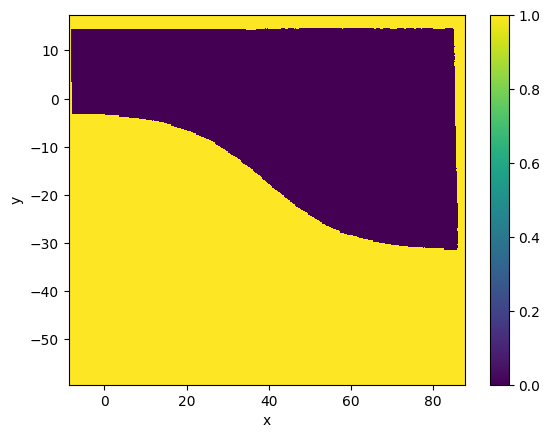

In [7]:
V_ech=V.sel(t=0)
V_nul=xr.where(((V_ech==0.0)&((V_ech.coords['y']<0.0)|(V_ech.coords['y']>-35.0))),1,0)
print(V_nul.coords['x'])
print(V_nul.coords['y'])
xr.plot.pcolormesh(V_nul,x=V_nul.dims[0],y=V_nul.dims[1])

In [8]:
print(V_nul.coords['x'])
print(V_nul.values[0][0])

<xarray.DataArray 'x' (x: 413)>
array([-8.626214, -8.392241, -8.158269, ..., 87.302473, 87.536445, 87.770418])
Coordinates:
  * x        (x) float64 -8.626 -8.392 -8.158 -7.924 ... 87.07 87.3 87.54 87.77
1


In [9]:
print(V_nul.coords['x'].values[0])
print(V_nul.coords['x'].values[-1])
print(V_nul.coords['y'].values[0])
print(V_nul.coords['y'].values[-1])


-8.626213717460633
87.77041771411896
17.226713442802428
-59.282263445854184


Sélection des coordonées de la ligne délimitatrice du fond


3
412
58
nombre de points : 409


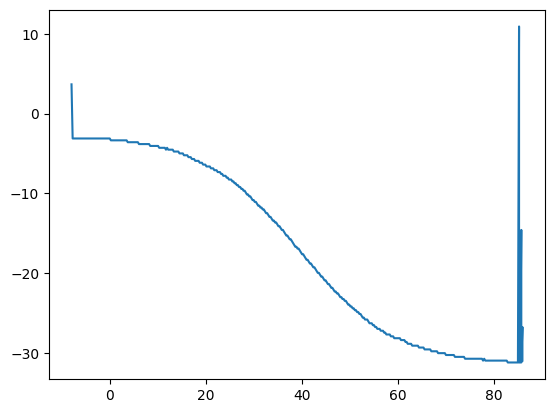

In [10]:
coords_x=V_nul.coords['x']
coords_y=V_nul.coords['y']
taille_x=coords_x.size
taille_y=coords_y.size
y_ligne=np.array([])
x_ligne=np.array([])
cpt=0
arg_tronc_x_min=0
arg_tronc_x_max=0
arg_tronc_y_min=0
arg_tronc_y_max=0
for i in range(0,taille_x):
    for j in range(0,taille_y-1):
        if (V_nul.values[i][j]==False) and (V_nul.values[i][j+1]==True):
            x_ligne=np.append(x_ligne,coords_x[i])
            y_ligne=np.append(y_ligne,coords_y[j])
            cpt+=1
            if cpt==1: 
                arg_tronc_x_min=i
                arg_tronc_y_min=j
arg_tronc_x_max=cpt+arg_tronc_x_min
print(arg_tronc_x_min)
print(arg_tronc_x_max)
print(arg_tronc_y_min)
print("nombre de points : "+str(cpt))
fig=plt.figure()
plt.plot(x_ligne,y_ligne)
#application d'un décalage: on passe à 0 le minimum de profondeur

In [11]:
print(U.x)

<xarray.DataArray 'x' (x: 413)>
array([-8.626214, -8.392241, -8.158269, ..., 87.302473, 87.536445, 87.770418])
Coordinates:
  * x        (x) float64 -8.626 -8.392 -8.158 -7.924 ... 87.07 87.3 87.54 87.77


[-14.39716239  44.4719311  -20.10814076   0.42641643]
[[ 1.58452396e-04 -3.65287551e-05  4.43748851e-04 -1.39632864e-04]
 [-3.65287551e-05  3.86944503e-04 -9.12250383e-05 -9.32889797e-05]
 [ 4.43748851e-04 -9.12250383e-05  1.63483898e-03 -3.96755893e-04]
 [-1.39632864e-04 -9.32889797e-05 -3.96755893e-04  1.84754847e-04]]
0.0851260022029835


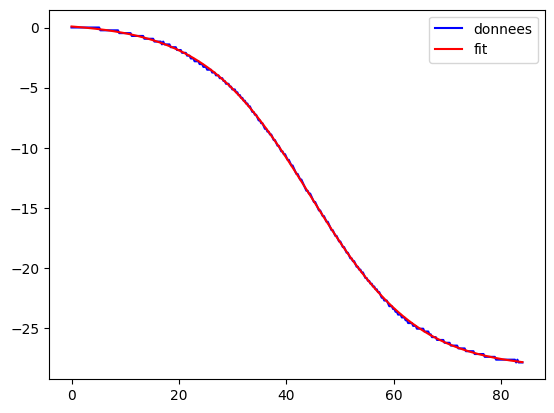

In [12]:
#fit avec la fonction precedente
#on prendra aussi le champ de vitesse sur cette plage d'abscisse
#on applique d'abord le decalage
arg_x_min=np.argmin(np.abs(x_ligne-(-5.0)))
arg_x_max=np.argmin(np.abs(x_ligne-79.0))
x_plage=x_ligne[arg_x_min:arg_x_max]
taille_plage_x=x_plage.size
y_plage=y_ligne[arg_x_min:arg_x_max]
x_min=x_plage.min()
y_min=y_plage.max()
U_trans=U.assign_coords(dict(x=U.x-x_min,y=U.y-y_min))
W_trans=W.assign_coords(dict(x=W.x-x_min,y=W.y-y_min))
V_nul_trans=V_nul.assign_coords(dict(x=V_nul.x-x_min,y=V_nul.y-y_min))
V_trans=V.assign_coords(dict(x=V_nul.x-x_min,y=V_nul.y-y_min))
def y(x,hs,vi,es,b):
    return hs*(1.0-np.tanh((x-vi)/es))+b
x_plage_shift=x_plage-x_min
y_plage_shift=y_plage-y_min
y_ligne_shift=y_ligne-y_min
x_plage=x_plage_shift
y_plage=y_plage_shift
y_ligne=y_ligne_shift
params,incer=scipy.optimize.curve_fit(y, x_plage,y_plage,p0=[-16,38.0,-26,0.0])
print(params)
print(incer)
plt.plot(x_plage,y_plage,'b',label='donnees')
hs=params[0];vi=params[1];es=params[2];b=params[3]
y_fit=y(x_plage,params[0],params[1],params[2],params[3])
plt.plot(x_plage,y_fit,'r',label='fit')
plt.legend()
print(np.max(y_fit))

On va ensuite calculer l'angle de la pente avec la dérivée : $$\theta(x)=\arctan(-\frac{hs}{es}\frac{1}{\cosh^{2}(\frac{x-vi}{es})})$$

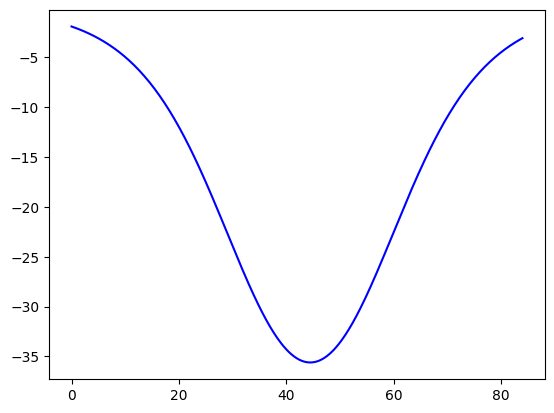

In [13]:
def theta_func(x):
    return np.arctan(-(hs/es)*(1.0/np.cosh(((x-vi)/es))**2))
theta=theta_func(x)
plt.plot(x_plage,np.degrees(theta_func(x_plage)),'b')

Calcul de la hauteur d'eau H.   
Par la suite, on ne prendra que les valeurs de vitesses dans x_plage et entre y_min et H_max. On a ainsi que les données utiles.
On a alors $H(x)=y_{max}(x)-y_{fit}(x)$   
**POUR RAPPEL : Ymin=Y[-1], YMAX=Y[0]. C'est inversé et PUTAIN QUE C'EST CHIANT**

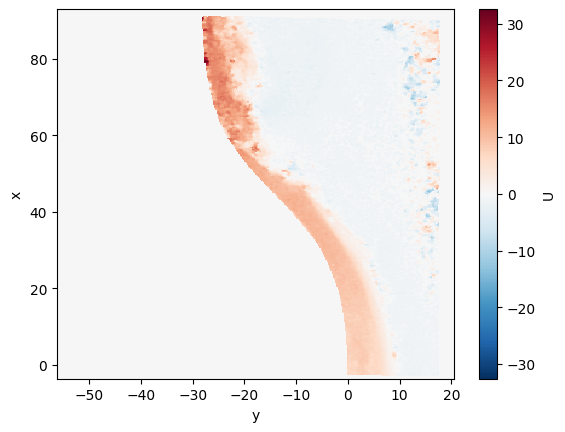

In [14]:
U_trans.isel(t=0).plot.pcolormesh()

<xarray.DataArray 'x' (x: 413)>
array([-3.509586, -3.275614, -3.041641, ..., 92.419101, 92.653073, 92.887045])
Coordinates:
  * x        (x) float64 -3.51 -3.276 -3.042 -2.808 ... 92.19 92.42 92.65 92.89
<xarray.DataArray 'y' (y: 328)>
array([ 20.355599,  20.121627,  19.887655, ..., -55.685433, -55.919405,
       -56.153378])
Coordinates:
  * y        (y) float64 20.36 20.12 19.89 19.65 ... -55.45 -55.69 -55.92 -56.15
<class 'xarray.core.dataarray.DataArray'>
17.704562006658975
(360,)
360
45.51837191404239
-27.813809907383416
17.704562006658975
(328,)
207
<xarray.DataArray (x: 360, y: 196, t: 2001)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.09711003,  1.72155186,  1.19438024, ...,  2.10660774,
          0.21891034,  0.72545732],
        [ 1.18766066,  1.11129192,  1.32811567, ...,  1.2447802 ,
          0.32867956,  1.87961473],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        

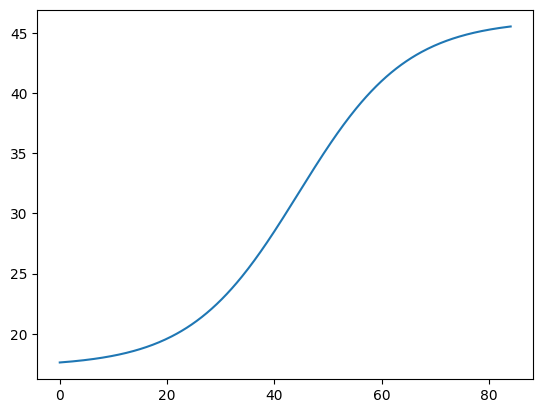

In [15]:
y_max=np.zeros(taille_plage_x)
coords_x=V_nul_trans.coords['x']
coords_y=V_nul_trans.coords['y']
print(coords_x)
print(coords_y)
print(type(coords_y))
valeurs_y=np.array(coords_y.values)
valeurs_x=np.array(coords_x.values)
for i in range(0,taille_plage_x):
    for j in range(0,taille_y-1):
        if (V_nul_trans.values[i][j]==True) and (V_nul_trans.values[i][j+1]==False):
            y_max[i]=coords_y[j]
            if y_max[i]==0.0: y_max[i]=np.NaN
y_max_moy=np.mean(y_max)
print(y_max_moy)
H=np.mean(y_max)-y_fit
print(H.shape)
print(taille_plage_x)
print(np.max(H))
print(np.min(y_fit))
print(y_max_moy)
plt.plot(x_plage,H)
print(coords_y.values.shape)
#y_min=min(y_fit),y_max=np.mean(y_max)
arg_x_min_tot=arg_tronc_x_min+arg_x_min
arg_x_max_tot=arg_tronc_x_min+arg_x_max
arg_y_max_tot=np.argmin(np.abs(coords_y.values-y_max_moy))
arg_y_min_tot=np.argmin(np.abs(coords_y.values-np.min(y_ligne)))
theta=theta_func(valeurs_x[arg_x_min_tot:arg_x_max_tot])
print(arg_y_min_tot)
U_sel=U_trans.isel(x=slice(arg_x_min_tot,arg_x_max_tot),y=slice(arg_y_max_tot,arg_y_min_tot))
W_sel=W_trans.isel(x=slice(arg_x_min_tot,arg_x_max_tot),y=slice(arg_y_max_tot,arg_y_min_tot))
V_sel=V_trans.isel(x=slice(arg_x_min_tot,arg_x_max_tot),y=slice(arg_y_max_tot,arg_y_min_tot))
x_min=x_plage.min()
y_min=y_plage.max()
print(V_sel)

<xarray.DataArray 'y' ()>
array(-0.02890645)
196


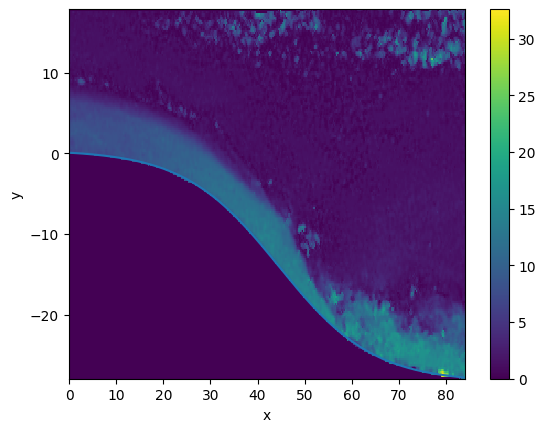

In [16]:
xr.plot.pcolormesh(V_sel.sel(t=0),x=V_sel.dims[0],y=V_sel.dims[1])
plt.plot(x_plage,y_fit)
print(V_sel.coords['y'].min()-np.min(y_fit))
print(V_sel.coords['y'].values.size)

In [17]:
print(V_sel.sel(t=0))

<xarray.DataArray (x: 360, y: 196)>
array([[ 0.        ,  1.09711003,  1.18766066, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.14549625,  1.0623052 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.18582381,  1.03534803, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 6.41294519,  5.65564691,  9.81346626, ..., 12.03203331,
        12.49078475, 12.34608025],
       [ 3.89046219,  8.20485851,  9.82879426, ..., 13.9530478 ,
        12.64353198, 12.04909595],
       [ 4.8492523 ,  7.97323961,  4.03845046, ..., 15.77239035,
        17.56046386, 16.46503697]])
Coordinates:
  * x        (x) float64 0.0 0.234 0.4679 0.7019 ... 83.29 83.53 83.76 84.0
  * y        (y) float64 17.78 17.55 17.31 17.08 ... -27.14 -27.37 -27.61 -27.84


Application d'une rotation dans le repère tangent à la pente.   
On applique pour cela la transformation suivante: $$
U_{t}(x',y',t)=U(x,y,t)\cos\theta(x)-W(x,y,t)\sin\theta(x) $$$$
W_{t}(x',y',t)=U(x,y,t)\sin\theta(x)+W(x,y,t)\cos\theta(x)
$$

In [18]:
nb_x=W_sel.coords['x'].size
print("debut rotation")
t1=time.time()
ech_U=U_sel
ech_W=W_sel
for i in range(0,nb_x):
    if i==0:t2=time.time()
    ech_U_x=U_sel.isel(x=i)
    ech_W_x=W_sel.isel(x=i)
    theta_x=theta[i]
    cos_theta=np.cos(theta_x);sin_theta=np.sin(theta_x)
    ech_U[dict(x=i)]=ech_U_x*cos_theta-ech_W_x*sin_theta
    ech_W[dict(x=i)]=ech_U_x*sin_theta+ech_W_x*cos_theta
    if i ==0 : print("temps pour une rotation  : "+str(time.time()-t2))
U_sel=ech_U
W_sel=ech_W
print("fin")
print("temps pris : "+str(int((time.time()-t1)/60))+" min")
print(U_sel.sel(t=0))

debut rotation
temps pour une rotation  : 0.02580547332763672
fin
temps pris : 0 min
<xarray.DataArray 'U' (x: 360, y: 196)>
array([[ 0.        , -1.09514627, -1.18631032, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.14375079, -1.05851421, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.18435606, -1.0319745 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 6.37543829,  5.05754786,  2.86369337, ..., 11.88697164,
        12.37306981, 12.23381838],
       [ 3.70898941,  2.20752755,  1.90405627, ..., 13.83193013,
        12.5203232 , 11.9514311 ],
       [ 2.81819005,  0.24355954,  0.86632972, ..., 15.61539457,
        17.35032174, 16.40269908]])
Coordinates:
  * x        (x) float64 0.0 0.234 0.4679 0.7019 ... 83.29 83.53 83.76 84.0
  * y        (y) float64 17.78 17.55 17.31 17.08 ... -27.14 -27.37 -27.61 -27.84


Calcul de la moyenne et extraction des fluctuations ainsi que des trois composantes du tenseur de Reynolds

In [19]:
W_sel_moy=W_sel.mean(dim='t')
U_sel_moy=U_sel.mean(dim='t')
nb_t=W_sel.coords['t'].size
U_f=U_sel
W_f=W_sel
for i in range(0,nb_t):
    U_t=U_sel.isel(t=i)
    W_t=W_sel.isel(t=i)
    U_f[dict(t=i)]=U_t-U_sel_moy
    W_f[dict(t=i)]=W_t-W_sel_moy
R_UU=(U_f**2).mean(dim='t')
R_WW=(W_f**2).mean(dim='t')
R_UW=(W_f*U_f).mean(dim='t')
print(R_UW)

<xarray.DataArray (x: 360, y: 196)>
array([[ 0.        , -0.18208575, -0.24203908, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.21290642, -0.24311525, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.2446895 , -0.23501477, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.23454606, -0.16483374,  0.31978682, ..., -2.77240925,
        -4.72481016, -6.78712175],
       [-0.31725079, -0.15165898,  0.06035594, ..., -3.05943525,
        -4.86256994, -6.15598711],
       [-0.25177517, -0.64660475, -0.71907433, ..., -3.04873575,
        -4.66677511, -5.78078261]])
Coordinates:
  * x        (x) float64 0.0 0.234 0.4679 0.7019 ... 83.29 83.53 83.76 84.0
  * y        (y) float64 17.78 17.55 17.31 17.08 ... -27.14 -27.37 -27.61 -27.84


On stocke ensuite tout dans un fichier NCDF4 pour pas avoir à refaire tout ce bordel

In [21]:
U_ds=U_sel
W_ds=W_sel
H_array=xr.DataArray(data=H,dims=['x'],coords=dict(x=(["x"],x_plage)),attrs=dict(description="profondeur",units="cm"))
y_array=xr.DataArray(data=y_plage,dims=['x'],coords=dict(x=(["x"],x_plage)),attrs=dict(description="fond",units="cm"))
H_ds=H_array.to_dataset(name="H");H_ds.attrs=dict(description="profondeur",units="cm")
y_ds=y_array.to_dataset(name="y_fond");y_ds.attrs=dict(description="fond",units="cm")
theta_array=xr.DataArray(data=theta,dims=['x'],coords=dict(x=(["x"],x_plage)),attrs=dict(description="angle_pente",units="radians"))
theta_ds=theta_array.to_dataset(name="theta");theta_ds.attrs=dict(description="angle_pente",units="radians")
print(H_ds)
U_ds=U_sel.to_dataset(name="U");U_ds.attrs=dict(description="vitesse tangentielle",units="cm/s")
W_ds=W_sel.to_dataset(name="W");W_ds.attrs=dict(description="vitesse normale",units="cm/s")
U_f_ds=U_f.to_dataset(name="U_f");U_f_ds.attrs=dict(description="fluctuations vitesse tangentielle ",units="cm/s")
W_f_ds=W_f.to_dataset(name="W_f");W_f_ds.attrs=dict(description="fluctuations vitesse normale ",units="cm/s")
U_m_ds=U_sel_moy.to_dataset(name="U_m");U_m_ds.attrs=dict(description="vitesse tangentielle moyenne ",units="cm/s")
W_m_ds=W_sel_moy.to_dataset(name="W_m");W_m_ds.attrs=dict(description="vitesse normale moyenne ",units="cm/s")
R_UU_ds=R_UU.to_dataset(name="R_UU");R_UU_ds.attrs=dict(description="R_UU (composante tenseur reynolds) ",units="(cm/s)**2")
R_WW_ds=R_WW.to_dataset(name="R_WW");R_WW_ds.attrs=dict(description="R_WW (composante tenseur reynolds) ",units="(cm/s)**2")
R_UW_ds=R_UW.to_dataset(name="R_UW");R_UW_ds.attrs=dict(description="R_UW (composante tenseur reynolds) ",units="(cm/s)**2")
print(R_UU_ds)
ds=xr.Dataset()
ds=ds.assign(U_ds)
ds=ds.assign(W_ds)
ds=ds.assign(U_m_ds)
ds=ds.assign(W_m_ds)
ds=ds.assign(U_f_ds)
ds=ds.assign(W_f_ds)
ds=ds.assign(R_UU_ds)
ds=ds.assign(R_WW_ds)
ds=ds.assign(R_UW_ds)
ds=ds.assign(H_ds)
ds=ds.assign(y_ds)
ds=ds.assign(theta_ds)
print(ds)


<xarray.Dataset>
Dimensions:  (x: 360)
Coordinates:
  * x        (x) float64 0.0 0.234 0.4679 0.7019 ... 83.29 83.53 83.76 84.0
Data variables:
    H        (x) float64 17.62 17.63 17.64 17.64 ... 45.48 45.49 45.51 45.52
Attributes:
    description:  profondeur
    units:        cm
<xarray.Dataset>
Dimensions:  (x: 360, y: 196)
Coordinates:
  * x        (x) float64 0.0 0.234 0.4679 0.7019 ... 83.29 83.53 83.76 84.0
  * y        (y) float64 17.78 17.55 17.31 17.08 ... -27.14 -27.37 -27.61 -27.84
Data variables:
    R_UU     (x, y) float64 0.0 0.4193 0.3619 0.2903 ... 15.04 33.03 50.23 58.84
Attributes:
    description:  R_UU (composante tenseur reynolds) 
    units:        (cm/s)**2
<xarray.Dataset>
Dimensions:  (x: 360, y: 196, t: 2001)
Coordinates:
  * x        (x) float64 0.0 0.234 0.4679 0.7019 ... 83.29 83.53 83.76 84.0
  * y        (y) float64 17.78 17.55 17.31 17.08 ... -27.14 -27.37 -27.61 -27.84
Dimensions without coordinates: t
Data variables:
    U        (x, y, t) float64 0.

In [22]:
nom=r"Q12g5_pretraite_2.nc"
ds.to_netcdf(nom)

In [23]:
file_path=os.getcwd()+r"/" +nom
r=nc.Dataset(file_path,'r')
print(r)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(360), y(196), t(2001)
    variables(dimensions): float64 x(x), float64 y(y), float64 U(x, y, t), float64 W(x, y, t), float64 U_m(x, y), float64 W_m(x, y), float64 U_f(x, y, t), float64 W_f(x, y, t), float64 R_UU(x, y), float64 R_WW(x, y), float64 R_UW(x, y), float64 H(x), float64 y_fond(x), float64 theta(x)
    groups: 


**VOILA FIN DE CETTE PREMIERE PARTIE ON EN A CHIE MAIS ON Y EST ARRIVE!!!**